# Import All Libraries and dataset



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pickle
from sklearn.metrics import precision_score
import itertools
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [4]:
%matplotlib inline

df = pd.read_excel('driver.xlsx', na_values=['#NAME?'])

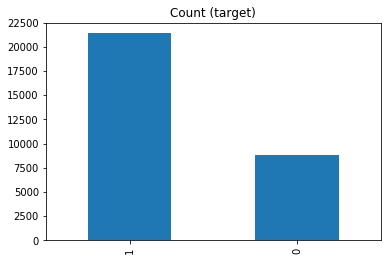

In [5]:
# Class count
count_class_1, count_class_0 = df.target.value_counts()

# Divide by class
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

#Under sampling the target value 1 
count_class_1

df.target.value_counts().plot(kind='bar', title='Count (target)');

Random under-sampling:
1    8844
0    8844
Name: target, dtype: int64


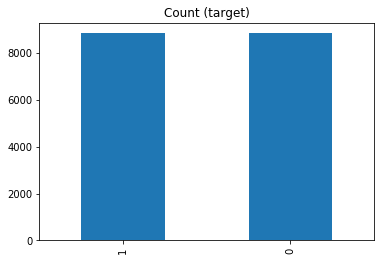

In [6]:
df_class_1_under = df_class_1.sample(count_class_0, random_state= 2)

df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [7]:
#Assign df_test_under as new dataframe object
df = df_test_under

In [60]:
#Remove this comment if want to select attribute manually
#labels = ["Gender","EngineHP","credit_history","Years_Experience","Marital_Status","Vehical_type","Miles_driven_annually"]

# Remove 'id' and 'target' columns
labels = df.columns[2:]
X = df[labels]
y = df['target']
print(X.head(11))

      Gender  EngineHP  credit_history  Years_Experience  annual_claims  \
6069       M       124             700                20              1   
18511      F       105             735                20              1   
14409      F       251             631                 7              1   
21933      M       126             735                10              1   
21795      F       120             788                17              0   
3433       M       404             819                 1              2   
17117      M       133             752                19              1   
2660       F       253             719                 8              2   
26213      F       117             680                25              1   
22744      M       102             617                 2              2   
24173      F        89             700                12              1   

      Marital_Status Vehical_type  Miles_driven_annually  size_of_family  \
6069         Married   

In [9]:
todummy_list = ['Gender', 'Marital_Status', 'Vehical_type', 'Age_bucket', 'EngineHP_bucket', 'Years_Experience_bucket', 'Miles_driven_annually_bucket', 'credit_history_bucket', 'State']

# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x,)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

X = dummy_df(X, todummy_list)

In [10]:
# Impute missing values using Imputer in sklearn.preprocessing

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

# Now check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).head()

C:\Users\Sky\Anaconda3\envs\mini-project\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


State_WY                             0
credit_history_bucket_Exceptional    0
Years_Experience_bucket_15-30        0
Years_Experience_bucket_3-8'         0
Years_Experience_bucket_9-14'        0
dtype: int64

In [50]:
# Separate the dataset become 70 percent trainning data and 30 percent testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test.loc[4]

EngineHP                                  120.0
credit_history                            788.0
Years_Experience                           17.0
annual_claims                               0.0
Miles_driven_annually                   13922.0
size_of_family                              1.0
Gender_F                                    1.0
Gender_M                                    0.0
Marital_Status_Married                      1.0
Marital_Status_Single                       0.0
Vehical_type_Car                            1.0
Vehical_type_Truck                          0.0
Vehical_type_Utility                        0.0
Vehical_type_Van                            0.0
Age_bucket_18-27                            0.0
Age_bucket_28-34                            0.0
Age_bucket_35-40                            0.0
Age_bucket_<18                              0.0
Age_bucket_>40                              1.0
EngineHP_bucket_161-350                     0.0
EngineHP_bucket_90-160                  

# Model without PCA

In [27]:
# Try with Non Linear SVM Model without PCA dimension reduction

svmnonlinear_noPca = svm.NuSVC(kernel='rbf',gamma='scale', probability=True)
svmnonlinear_noPca.fit(X_train,y_train)
y_pred = svmnonlinear_noPca.predict(X_test)
confidence = svmnonlinear_noPca.predict_proba(X_test)

accuracy_nonlinearsvm = accuracy_score(y_test, y_pred)
recall_nonlinearsvm = recall_score(y_test, y_pred)
conf_mat_nonlinearsvm = confusion_matrix(y_true=y_test, y_pred=y_pred)
precision_nonlinearsvm = precision_score(y_test, y_pred)
f1_score_nonlinearsvm = f1_score(y_test, y_pred)

print("Accuracy Non-linear: %.2f%%" % (accuracy_nonlinearsvm * 100.0))
print("Recall: ", recall_nonlinearsvm)
print("Precision: ", precision_nonlinearsvm)
print("F1 Score: ", f1_score_nonlinearsvm)
print("Confusion Matric: ", conf_mat_nonlinearsvm)


Accuracy Non-linear: 50.59%
Recall:  0.9073373676248109
Precision:  0.5023031825795645
F1 Score:  0.6466307277628033
Confusion Matric:  [[ 286 2377]
 [ 245 2399]]


In [53]:
#print(np.where(y_pred == 0))
X_test.loc[4]
#confidence[4831]

EngineHP                                  120.0
credit_history                            788.0
Years_Experience                           17.0
annual_claims                               0.0
Miles_driven_annually                   13922.0
size_of_family                              1.0
Gender_F                                    1.0
Gender_M                                    0.0
Marital_Status_Married                      1.0
Marital_Status_Single                       0.0
Vehical_type_Car                            1.0
Vehical_type_Truck                          0.0
Vehical_type_Utility                        0.0
Vehical_type_Van                            0.0
Age_bucket_18-27                            0.0
Age_bucket_28-34                            0.0
Age_bucket_35-40                            0.0
Age_bucket_<18                              0.0
Age_bucket_>40                              1.0
EngineHP_bucket_161-350                     0.0
EngineHP_bucket_90-160                  

In [ ]:
# Confusion Matrix of the Non-linear SVM

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat_nonlinearsvm)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_nonlinearsvm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [76]:
# Try with Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred)
recall_logistic = recall_score(y_test, y_pred)
conf_mat_logisticRegression = confusion_matrix(y_true=y_test, y_pred=y_pred)
precision_logisticRegression = precision_score(y_test, y_pred)
f1_score_logisticRegression= f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))
print("Recall Score", recall_logistic)
print("Precision Score: ", precision_logisticRegression)
print("F1 Score: ", f1_score_logisticRegression)
print("Confusion Matric Logistic: ", conf_mat_logisticRegression)


C:\Users\Sky\Anaconda3\envs\mini-project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 49.09%
Recall Score 0.4633131618759455
Precision Score:  0.48843700159489634
F1 Score:  0.4755434782608695
Confusion Matric Logistic:  [[1380 1283]
 [1419 1225]]


Confusion matrix:
 [[1380 1283]
 [1419 1225]]


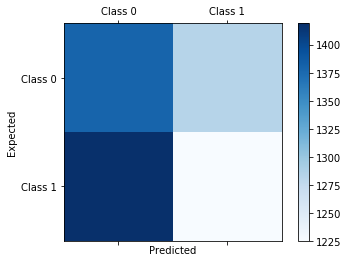

In [77]:
# Confusion Matrix of the Logistic regression

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat_logisticRegression)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_logisticRegression, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [78]:
# Try with Random Forest Classfier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

estimator = rf.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = [0,1,2,3,4,5,6,7,8,9],
                #class_names = [0,1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

accuracy_randomForest = accuracy_score(y_test, y_pred)
recall_randomForest = recall_score(y_test, y_pred)
conf_mat_randomForest = confusion_matrix(y_true=y_test, y_pred=y_pred)
precision_randomForest = precision_score(y_test, y_pred)
f1_score_randomForest = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy_randomForest * 100.0))
print("Recall Score", recall_randomForest)
print("Precision Score: ", precision_randomForest)
print("F1 Score: ", f1_score_randomForest)
print("Confusion Matric Random Forest: ", conf_mat_randomForest)


Accuracy: 50.56%
Recall Score 0.5075642965204236
Precision Score:  0.5037537537537538
F1 Score:  0.5056518462697813
Confusion Matric Random Forest:  [[1341 1322]
 [1302 1342]]


Confusion matrix:
 [[1341 1322]
 [1302 1342]]


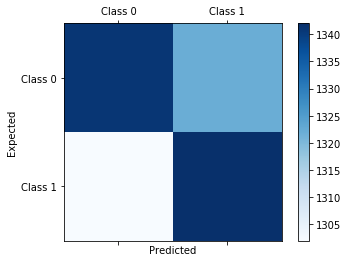

In [79]:
# Confusion Matrix of the Random Forest Before PCA dimension Reduction

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat_randomForest)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_randomForest, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Modeling With Preprocessing of data



# Min Max Scalar

In [80]:
# Use MinMaxScaler for normalize our data to range 0 to 1

cs = MinMaxScaler()
# Fit on training set only.
X_train = cs.fit_transform(X_train)
X_test = cs.transform(X_test)

X_train

array([[0.069869  , 0.73090909, 0.23076923, ..., 0.        , 0.        ,
        0.        ],
       [0.37882096, 0.64545455, 0.02564103, ..., 0.        , 0.        ,
        0.        ],
       [0.05786026, 0.78909091, 0.87179487, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04039301, 0.73818182, 0.43589744, ..., 0.        , 0.        ,
        0.        ],
       [0.00764192, 0.87818182, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.6069869 , 0.64363636, 0.02564103, ..., 0.        , 0.        ,
        0.        ]])

# PCA Dimension Reduction

In [81]:
#from sklearn.decomposition import PCA
# Make an instance of the Model

pca = PCA(n_components=10)

pca.fit(X_train)
pca.n_components_

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_train

array([[-0.7982177 , -0.7214153 ,  0.10364671, ...,  0.65878243,
         0.4791647 ,  0.34360809],
       [-0.02651831, -0.9768591 ,  0.09851905, ...,  1.3690828 ,
        -0.14417324,  0.48816609],
       [-1.25332035, -0.55153978,  0.04354274, ...,  0.3217851 ,
         0.57593318,  0.09495518],
       ...,
       [-0.86275659, -0.45255899, -0.90118929, ..., -0.20996615,
        -0.1634453 , -0.19317423],
       [ 0.10344828,  1.12375686, -0.11584898, ...,  0.07468522,
         0.83439045,  0.24661607],
       [ 0.66551404, -0.93252449, -0.87893674, ...,  0.71107284,
        -0.09307996,  0.1626237 ]])

# Model after Feature Engineering

In [25]:
# Try with Non Linear SVM Model with PCA dimension reduction

svmnonlinear_PCA = svm.NuSVC(kernel='poly',gamma='scale', probability=True)
svmnonlinear_PCA.fit(X_train,y_train)
y_pred = svmnonlinear_PCA.predict(X_test)
print(y_pred)

accuracy_nonlinearsvm = accuracy_score(y_test, y_pred)
recall_nonlinearsvm = recall_score(y_test, y_pred)
conf_mat_nonlinearsvm = confusion_matrix(y_true=y_test, y_pred=y_pred)
precision_nonlinearsvm = precision_score(y_test, y_pred)
f1_score_nonlinearsvm = f1_score(y_test, y_pred)

print("Accuracy Non-linear: %.2f%%" % (accuracy_nonlinearsvm * 100.0))
print("Recall: ", recall_nonlinearsvm)
print("Precision: ", precision_nonlinearsvm)
print("F1 Score: ", f1_score_nonlinearsvm)
print("Confusion Matric: ", conf_mat_nonlinearsvm)

[1 1 1 ... 1 1 1]
Accuracy Non-linear: 50.24%
Recall:  0.9005295007564297
Precision:  0.500315192267283
F1 Score:  0.6432527353775496
Confusion Matric:  [[ 285 2378]
 [ 263 2381]]


Confusion matrix:
 [[ 286 2377]
 [ 245 2399]]


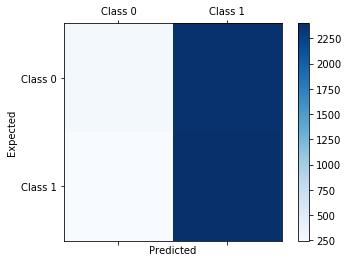

In [14]:
# Confusion Matrix of the Non-linear SVM with PCA dimension Reduction

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat_nonlinearsvm)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_nonlinearsvm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [15]:
# Try with Logistic Regression after dimension reduction

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred)
recall_logistic = recall_score(y_test, y_pred)
conf_mat_logisticRegression = confusion_matrix(y_true=y_test, y_pred=y_pred)
precision_logisticRegression = precision_score(y_test, y_pred)
f1_score_logisticRegression = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))
print("Recall Score", recall_logistic)
print("Precision Score: ", precision_logisticRegression)
print("F1 Score: ", f1_score_logisticRegression)
print("Confusion Matric Logistic: ", conf_mat_logisticRegression)


C:\Users\Sky\Anaconda3\envs\mini-project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 49.09%
Recall Score 0.4633131618759455
Precision Score:  0.48843700159489634
F1 Score:  0.4755434782608695
Confusion Matric Logistic:  [[1380 1283]
 [1419 1225]]


Confusion matrix:
 [[1380 1283]
 [1419 1225]]


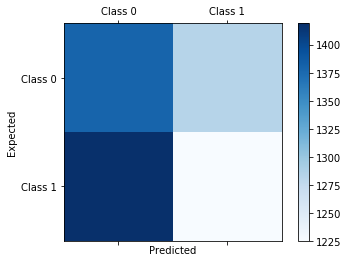

In [16]:
# Confusion Matrix of the Logistic regression

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat_logisticRegression)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_logisticRegression, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [17]:
# Try with Random Forest Classfier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

estimator = rf.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = [0,1,2,3,4,5,6,7,8,9],
                #class_names = [0,1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

accuracy_randomForest = accuracy_score(y_test, y_pred)
recall_randomForest = recall_score(y_test, y_pred)
conf_mat_randomForest = confusion_matrix(y_true=y_test, y_pred=y_pred)
precision_randomForest = precision_score(y_test, y_pred)
f1_score_randomForest = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy_randomForest * 100.0))
print("Recall Score", recall_randomForest)
print("Precision Score: ", precision_randomForest)
print("F1 Score: ", f1_score_randomForest)
print("Confusion Matric Random Forest: ", conf_mat_randomForest)

Accuracy: 50.44%
Recall Score 0.49848714069591527
Precision Score:  0.5026697177726926
F1 Score:  0.5005696923661223
Confusion Matric Random Forest:  [[1359 1304]
 [1326 1318]]


Confusion matrix:
 [[1359 1304]
 [1326 1318]]


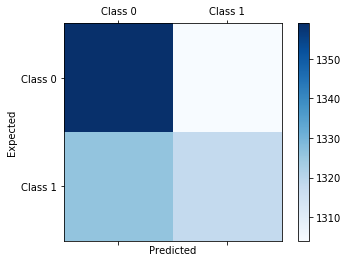

In [18]:
# Confusion Matrix of the Random Forest

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat_randomForest)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_randomForest, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Here got explain how the measure work

https://classeval.wordpress.com/introduction/basic-evaluation-measures/

ERR = (FP+FN)/(TP+TN+FN+FP)

Error Rate is calculated as the total number of 2 incorrect predictions (FN+FP) divided by the total number of a dataset (P+N).

Accuracy = (TP+TN)/(P+N)

Accuracy is calculated as the total number of 2 correct predictions (TP+TN) divided by the total number of a dataset (P+N).

Recall or True Positive Rate

Number of correct positive predictions (TP) divided by the total number of postives (P).

False Postive Rate

Calculated as the number of incorrect positive predictions (FP) divided by the total number of negatives (N).

In [24]:
# save the nonlinear svm model before feature engineering to disk

filename_nonlinearsvm = 'svm_rbf_model.sav'
pickle.dump(svmnonlinear_noPca, open(filename_nonlinearsvm, 'wb'))